# AHJIN STUDIOS: Box Office Success Blueprint

## Project Overview

Ahjin Studios is taking a bold leap into the world of original video content. With major players in the industry producing record-breaking films, it's time we carve our own path to the silver screen. But before the cameras roll, we need to ground our creativity in strategy. This project explores which types of films are dominating the box office - genres, themes, release seasons, production budgets, and more - to identify what’s *actually working* in today’s film market.

## Business Problem

The entertainment industry is undergoing a massive transformation. Streaming giants and traditional studios alike are pouring billions into original content, resulting in a saturated, competitive, and fast-evolving market. Ahjin Studios, a newcomer in this arena, wants to make a strong, strategic entrance. But without prior experience in filmmaking or content production, the studio lacks a grounded understanding of what drives box office success.

While creativity is the soul of cinema, data is its compass. The financial risk of producing a film is substantial, with production budgets often ranging from millions to hundreds of millions of dollars — and no guaranteed return. Choosing the wrong genre, misreading audience interests, or releasing at the wrong time can spell disaster. Conversely, aligning a film's concept with market demand can lead to runaway hits, brand recognition, and long-term profitability.

Ahjin Studios needs clear, evidence-based insights to answer critical questions:

- What types of movies are **worth betting on**?
- Where can we find the **sweet spot between budget and revenue**?
- Which trends are **passing fads**, and which are **sustainable opportunities**?
- How can a **new studio** stand out in a market dominated by legacy franchises and big-name talent?

By conducting a comprehensive analysis of recent box office performance, this project aims to **remove the guesswork** from movie production decisions and provide Ahjin Studios with a **strategic blueprint** for launching commercially viable, audience-ready films that can hold their own in today’s high-stakes entertainment landscape.

## Objective

To analyze recent box office trends and translate key findings into **actionable, data-driven recommendations** that will guide Ahjin Studios in developing high-performing original films.

## Key Questions

- Which **genres** are consistently earning the highest revenue?
- What **budget range** yields the best ROI?
- How do **release dates** affect performance?
- Do **star power** and **director reputation** play a measurable role?
- Are **franchise films** outperforming standalones?
- What **audience demographics** are driving ticket sales?

## Deliverables

- A clean and exploratory dataset analysis of recent box office films
- Visual breakdowns of top-performing genres, budgets, and seasons
- A concise summary report with **strategic recommendations** for Ahjin Studios

## Final Goal

To provide the leadership team at Ahjin Studios with a **clear roadmap for movie production** - one that maximizes commercial success while carving out a unique space in the entertainment industry.

> Lights, camera... data! Let's get to work.

## INITIAL DATA UNDERSTANDING

### 1. BUDGET DATASET

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [91]:
# Load the dataset
budget_df = pd.read_csv(r'..\Raw_Data\tn.movie_budgets.csv', encoding = 'Latin1')
budget_df.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [92]:
# Display column names
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [93]:
# Display descriptive statistics for categorical columns
budget_df.describe(include = 'O').T

,count,unique,top,freq
release_date,5782,2418,"Dec 31, 2014",24
movie,5782,5698,Halloween,3
production_budget,5782,509,"$20,000,000",231
domestic_gross,5782,5164,$0,548
worldwide_gross,5782,5356,$0,367


### 2. GROSS DATASET

In [94]:
gross_df =pd.read_csv(r'..\Raw_Data\bom.movie_gross.csv',encoding = 'Latin1')


In [95]:
# Display the shape 
print(f"The dataset has {gross_df.shape[0]} rows and {gross_df.shape[1]} columns.")

The dataset has 3387 rows and 5 columns.


In [96]:
# Get basic statistics for numerical columns
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [97]:
# Check for duplicates and null values
print("Duplicates:", gross_df.duplicated().sum())
print("\nNull Values:\n", gross_df.isna().sum())

Duplicates: 0

Null Values:
 title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [98]:
# Load TMDB movies dataset
tmdb_df = pd.read_csv(r'..\Raw_Data\tmdb.movies.csv', index_col = 0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [99]:
# Display column names
tmdb_df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [100]:
# Display descriptive statistics for numerical columns
tmdb_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [101]:
# Check for duplicates and null values
print('Duplicates:', tmdb_df.duplicated().sum())
print('\nNull Values:\n', tmdb_df.isna().sum())

Duplicates: 1020

Null Values:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [102]:
# Load dataset
rt_movies_df = pd.read_csv(r"..\Raw_Data\rt.movie_info.tsv", sep = '\t')
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [103]:
# Display column names
rt_movies_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [104]:
# Get basic statistical information for categorical columns
rt_movies_df.describe(include = 'O').T

,count,unique,top,freq
synopsis,1498,1497,A group of air crash survivors are stranded in...,2
rating,1557,6,R,521
genre,1552,299,Drama,151
director,1361,1125,Steven Spielberg,10
writer,1111,1069,Woody Allen,4
theater_date,1201,1025,"Jan 1, 1987",8
dvd_date,1201,717,"Jun 1, 2004",11
currency,340,1,$,340
box_office,340,336,"200,000",2
runtime,1530,142,90 minutes,72


## OBSERVATIONS AND EARLY INSIGHTS

We conducted an Initial Data Exploration (IDE) across the five key datasets powering our movie analytics project. The goal was to understand data structure, completeness, and quality before diving into cleaning or modeling. Below is a summary of our early findings:

### 1. **Movie Budgets Dataset**
- **Rows × Columns**: 5,782 × 6  
- **Key Columns**: 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'
- **Highlights**:
  - No missing values - dataset is fully complete.
  - All monetary fields are stored as strings (e.g., "$100,000,000") and need conversion to numeric types.
  - Over 500 movies show $0 in 'domestic_gross', and 367 in 'worldwide_gross'. These likely represent unreported or missing data.
  - No duplicate entries found.

### 2. **Gross Revenue Dataset**
- **Rows × Columns**: 3,387 × 5  
- **Key Columns**: 'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'
- **Highlights**:
  - 'foreign_gross' has 1,350 missing entries - over one-third of the dataset.
  - Minor missingness in 'studio' (5 rows) and 'domestic_gross' (28 rows).
  - Some monetary columns stored as objects instead of numeric types.
  - No duplicate rows detected.

### 3. **TMDB Movies Dataset**
- **Rows × Columns**: 26,517 × 9  
- **Key Columns**: 'genre_ids', 'original_title', 'popularity', 'vote_average', 'vote_count'
- **Highlights**:
  - No missing values - data is complete.
  - 1,020 duplicate entries found and should be handled during cleaning.
  - 'genre_ids' stored as stringified lists - requires parsing for analysis.
  - Excellent coverage of audience ratings, language, and popularity trends.

### HANDLING NULL VALUES
#### 1. GROSS DATASET

#### 'studio' Column

In [105]:
# Impute nulls in studio column
gross_df.loc[gross_df['title'] == 'Plot for Peace', 'studio'] = 'Trinity Films'
gross_df.loc[gross_df['title'] == 'Fireflies in the Garden', 'studio'] = 'Senator Entertainmet Inc.'
gross_df.loc[gross_df['title'] == 'Keith Lemon: The Film', 'studio'] = 'Lionsgate'
gross_df.loc[gross_df['title'] == 'Secret Superstar', 'studio'] = 'Zee Studios'
gross_df.loc[gross_df['title'] == 'Outside the Law (Hors-la-loi)', 'studio'] = 'StudioCanal'

# Preview changes
print("Null values after imputation:", gross_df['studio'].isna().sum())

Null values after imputation: 0


In [106]:
# Get rows with nulls
gross_df.loc[gross_df['domestic_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010


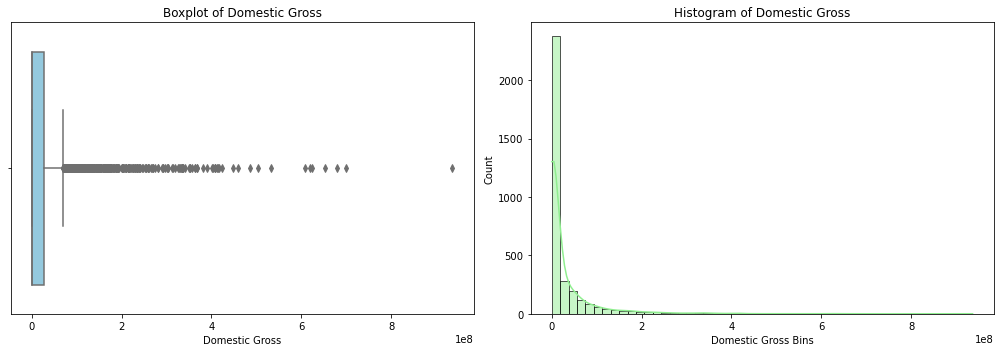

In [107]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

# Boxplot
sns.boxplot(data=gross_df, x='domestic_gross', ax = axes[0], color = 'skyblue')
axes[0].set_title("Boxplot of Domestic Gross")
axes[0].set_xlabel("Domestic Gross")

# Histogram with KDE
sns.histplot(data = gross_df, x = 'domestic_gross', bins=50, kde=True, ax = axes[1], color = 'lightgreen')
axes[1].set_title("Histogram of Domestic Gross")
axes[1].set_xlabel("Domestic Gross Bins")
plt.tight_layout()
plt.show()

In [108]:
# Preview rows with nulls in foreign_gross
gross_df.loc[gross_df['foreign_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010


In [109]:
# Imputation strategy:

# Coerce to numeric
gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'], errors='coerce')

# Impute median
median_foreign_gross = gross_df['foreign_gross'].median()
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(median_foreign_gross)

# Preview changes
print("Null Values after imputation:", gross_df['foreign_gross'].isna().sum())

Null Values after imputation: 0


### OTLIER HANDLING IN GROSS DATASET

#### Comment on Outliers

> The boxplots for both **domestic** and **foreign gross** clearly reveal the presence of extreme outliers - films that have earned substantially more than the majority. In the movie industry, these are typically blockbuster titles, franchise installments, or globally viral releases with massive marketing budgets and wide theatrical distribution. These high-grossing films, while statistically extreme, represent genuine and meaningful data points.
>
> **Removing these outliers would strip away the very success stories we aim to emulate**. Therefore, we will **retain the outliers** in our analysis to ensure we capture the full spectrum of market performance and derive actionable insights from the most profitable examples.

In [110]:
null_counts = rt_movies_df.isna().sum()
null_percentages = (null_counts / len(rt_movies_df)) * 100

null_df = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentages.round(2)
})

print(null_df)

              Null Count  Null Percentage (%)
id                     0                 0.00
synopsis              62                 3.97
rating                 3                 0.19
genre                  8                 0.51
director             199                12.76
writer               449                28.78
theater_date         359                23.01
dvd_date             359                23.01
currency            1220                78.21
box_office          1220                78.21
runtime               30                 1.92
studio              1066                68.33


In [111]:
rt_movies_df.loc[rt_movies_df['rating'].isna()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Drop useless columns
rt_movies_df = rt_movies_df.drop(columns = [
    "studio",
    "dvd_date",
    "currency",
    "synopsis",
])

rt_movies_df = rt_movies_df.rename(columns = {"rating": "maturity_rating"})

# Drop useless rows
rt_movies_df = rt_movies_df.dropna(subset = ["maturity_rating", "genre"])

# Fill remaining categorical columns with 'unknows'
cat_cols = rt_movies_df.select_dtypes(include = ['object']).columns

for col in cat_cols:
   rt_movies_df[col].fillna('Unknown', inplace = True)

# Preview changes
rt_movies_df.isna().sum()

id                 0
maturity_rating    0
genre              0
director           0
writer             0
theater_date       0
box_office         0
runtime            0
dtype: int64

In [113]:
print("Duplicates before imputation:", tmdb_df.duplicated().sum())

tmdb_df = tmdb_df.drop_duplicates()
print("\nDuplicates after imputation:", tmdb_df.duplicated().sum())

Duplicates before imputation: 1020

Duplicates after imputation: 0


#### BUDGET DATASET

In [114]:
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_clean:
    budget_df[col] = (
        budget_df[col]
        .str.replace(r'[\$,]', '', regex = True) 
        .astype(float)                          
    )

budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### GROSS DATASET

## IM.DB DATASET

In [115]:
conn = sqlite3.connect(r'..\Raw_Data\im.db') 
cur = conn.cursor() 

In [116]:
moviebasics_df = pd.read_sql("""SELECT * FROM movie_basics""", conn)
moviebasics_df 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [117]:
# Get the number of rows and columns 
moviebasics_df.shape

(146144, 6)

In [118]:
# Get the data types
moviebasics_df.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [119]:
# Categorical Summary 
moviebasics_df.describe(include = 'O').T

,count,unique,top,freq
movie_id,146144,146144,tt3652200,1
primary_title,146144,136071,Home,24
original_title,146123,137773,Broken,19
genres,140736,1085,Documentary,32185


In [120]:
# Viewing null values in 'original_title'
moviebasics_df.loc[moviebasics_df['original_title'].isna()]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
39095,tt2397619,Woody Allen: A Documentary,None,2012,195.0,None
58624,tt3414266,The Outer Loop,None,2013,78.0,None
62944,tt3616658,The Hangman,None,2017,NaN,None
79274,tt4548042,Urban Legend: The Blind Side Strangler,None,2016,NaN,None
80116,tt4599436,Please Don't Eat the Pansies,None,2016,NaN,None
82058,tt4715728,Regen,None,2016,NaN,None
82308,tt4732998,Limbo,None,2017,NaN,None
85353,tt4940426,OldZilla,None,2018,NaN,None
104040,tt6092540,Rangreza,None,2017,NaN,None
104418,tt6107024,The Cage,None,2017,NaN,None


In [121]:
# View null values in run_time_minutes
moviebasics_df.loc[moviebasics_df['runtime_minutes'].isna()]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,None
21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
...,...,...,...,...,...,...
146131,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [122]:
# eplace Null in genres with unknown
moviebasics_df['genres'] = moviebasics_df['genres'].fillna('Unknown')

In [123]:
# Load movie_ratings table 
movieratings_df = pd.read_sql("""SELECT * FROM movie_ratings""", conn)
movieratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [124]:
# Check for column names
movieratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [125]:
# Statistical summary
movieratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
averagerating,73856.0,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0


In [126]:
# Check for null values 
movieratings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [127]:
print(movieratings_df.columns)

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')


In [128]:
moviebasics_df['movie_id'].head()

0    tt0063540
1    tt0066787
2    tt0069049
3    tt0069204
4    tt0100275
Name: movie_id, dtype: object

In [129]:
q = """
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.original_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating,
    mr.numvotes
FROM movie_basics mb
INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

movies_df = pd.read_sql(q, conn)
movies_df.head() 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [130]:
null_counts = movies_df.isna().sum()
null_percentages = (null_counts / len(movies_df)) * 100

null_df = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentages.round(2)
})

print(null_df)

                 Null Count  Null Percentage (%)
movie_id                  0                 0.00
primary_title             0                 0.00
original_title            0                 0.00
start_year                0                 0.00
runtime_minutes        7620                10.32
genres                  804                 1.09
averagerating             0                 0.00
numvotes                  0                 0.00


In [131]:
# Drop null values in 'genres'
movies_df = movies_df.dropna(subset=['genres'])

# Preview changes
movies_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
averagerating         0
numvotes              0
dtype: int64

## EXPLORATORY DATA ANALYSIS

Univariate analysis


What budget ranges do most movies fall into?

Which genres dominate the movie industry?

What revenue patterns can we expect?

How do audiences rate movies typically?

Which studios are the major players?

Are movie releases increasing over time?

### 1. FINANCIAL METRICS ANALYSIS

<25M        3452
25–50M      1122
50–75M       536
75–100M      266
100–150M     211
150–200M     132
Name: budget_bin, dtype: int64


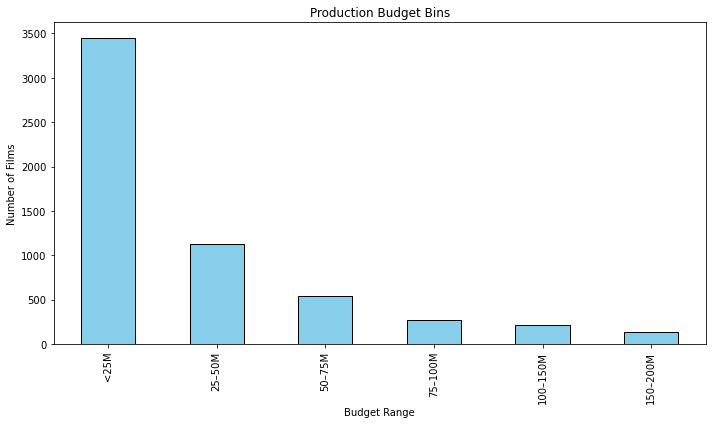

In [132]:

# Assuming budget_df['production_budget'] is already cleaned and numeric

# Define bins and labels
bins = [0, 25_000_000, 50_000_000, 75_000_000, 100_000_000, 150_000_000, 200_000_000]
labels = ['<25M', '25–50M', '50–75M', '75–100M', '100–150M', '150–200M']

# Create bin column
budget_df['budget_bin'] = pd.cut(budget_df['production_budget'], bins=bins, labels=labels, right=False)

# Count per bin
bin_counts = budget_df['budget_bin'].value_counts().sort_index()
print (bin_counts)
# Plot
plt.figure(figsize =(10,6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Production Budget Bins')
plt.xlabel('Budget Range')
plt.ylabel('Number of Films')
plt.tight_layout()
plt.show()




In [133]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5782 non-null   int64   
 1   release_date       5782 non-null   object  
 2   movie              5782 non-null   object  
 3   production_budget  5782 non-null   float64 
 4   domestic_gross     5782 non-null   float64 
 5   worldwide_gross    5782 non-null   float64 
 6   budget_bin         5719 non-null   category
dtypes: category(1), float64(3), int64(1), object(2)
memory usage: 277.0+ KB


In [134]:
budget_df['domestic_gross'] = pd.to_numeric(budget_df['domestic_gross'], errors = 'coerce')
print(budget_df[['domestic_gross']].dtypes)

domestic_gross    float64
dtype: object


<25M        3298
25–50M       958
50–75M       545
75–100M      273
100–150M     348
150–200M     155
Name: domestic_bin, dtype: int64


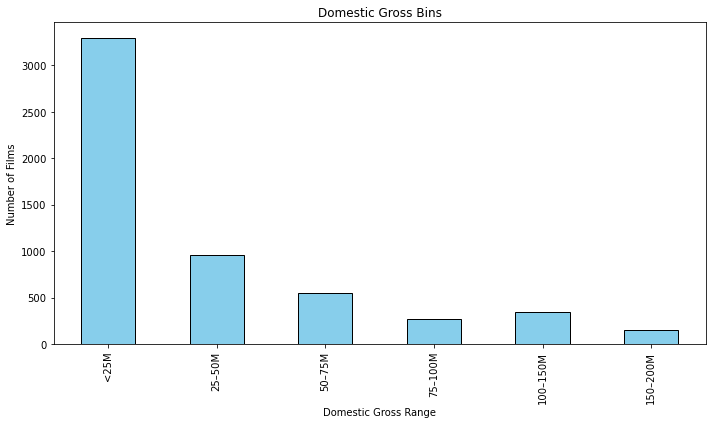

In [135]:

# Assuming budget_df['production_budget'] is already cleaned and numeric

# Define bins and labels
bins = [0, 25_000_000, 50_000_000, 75_000_000, 100_000_000, 150_000_000, 200_000_000]
labels = ['<25M', '25–50M', '50–75M', '75–100M', '100–150M', '150–200M']

# Create bin column
budget_df['domestic_bin'] = pd.cut(budget_df['domestic_gross'], bins=bins, labels=labels, right=False)

# Count per bin
bin_counts = budget_df['domestic_bin'].value_counts().sort_index()
print (bin_counts)
# Plot
plt.figure(figsize =(10,6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Domestic Gross Bins')
plt.xlabel('Domestic Gross Range')
plt.ylabel('Number of Films')
plt.tight_layout()
plt.show()




In [136]:
budget_df['worldwide_gross'] = pd.to_numeric(budget_df['worldwide_gross'], errors = 'coerce')
print(budget_df[['worldwide_gross']].dtypes)

worldwide_gross    float64
dtype: object


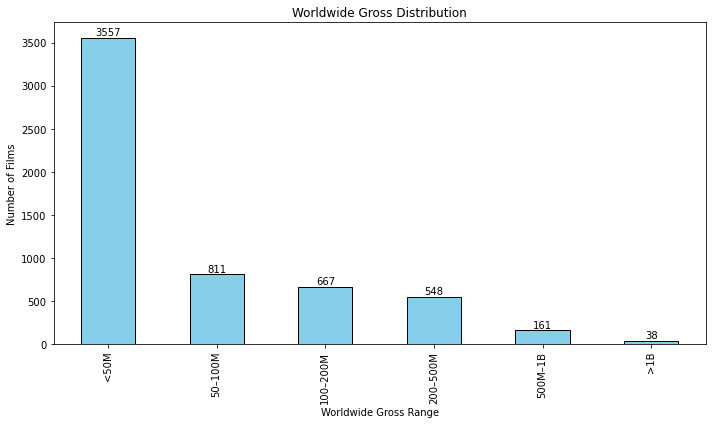

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and convert worldwide_gross to numeric
cleaned_gross = budget_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Define bin edges and labels
bins = [0, 50_000_000, 100_000_000, 200_000_000, 500_000_000, 1_000_000_000, float('inf')]
labels = ['<50M', '50–100M', '100–200M', '200–500M', '500M–1B', '>1B']

# Bin values and count frequencies
bin_counts = pd.cut(cleaned_gross, bins=bins, labels=labels, right=False).value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
ax = bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Worldwide Gross Distribution')
plt.xlabel('Worldwide Gross Range')
plt.ylabel('Number of Films')

# Add count labels on top of bars
for i, count in enumerate(bin_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 2. RATINGS AND POPULARITY ANALYSIS

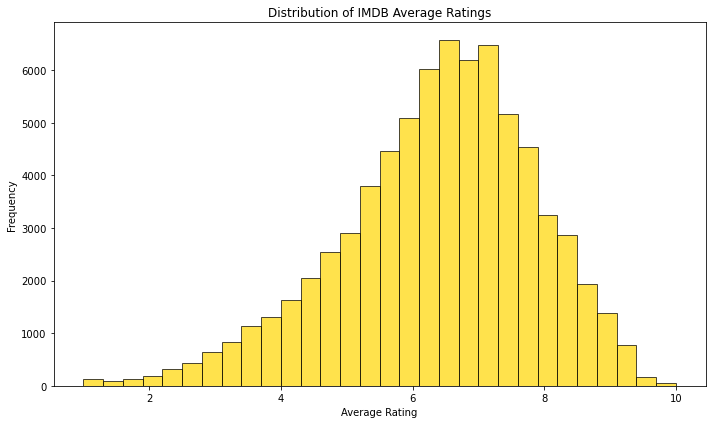

IMDB Average Ratings Summary:
count    73052.000000
mean         6.330930
std          1.474699
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64


In [138]:
#  IMDB Average Ratings Distribution
plt.figure(figsize=(10, 6))
plt.hist(movies_df['averagerating'], bins=30, alpha=0.7, color='gold', edgecolor='black')
plt.title('Distribution of IMDB Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary statistics
print("IMDB Average Ratings Summary:")
print(movies_df['averagerating'].describe())

### 3. CATEGORICAL VARIABLES ANALYSIS

Top 10 Genres:
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Name: genres, dtype: int64


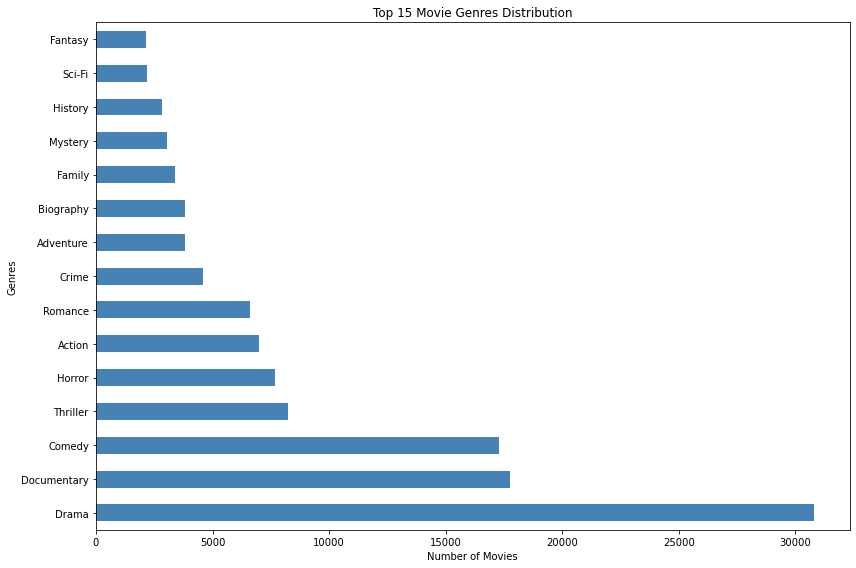

In [139]:
#  Genre Distribution (from IMDB data)
# Split genres and count occurrences
genre_counts = movies_df['genres'].str.split(',').explode().value_counts().head(15)

# Summary
print("Top 10 Genres:")
print(genre_counts.head(10)) 

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='barh', color='steelblue')
plt.title('Top 15 Movie Genres Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()



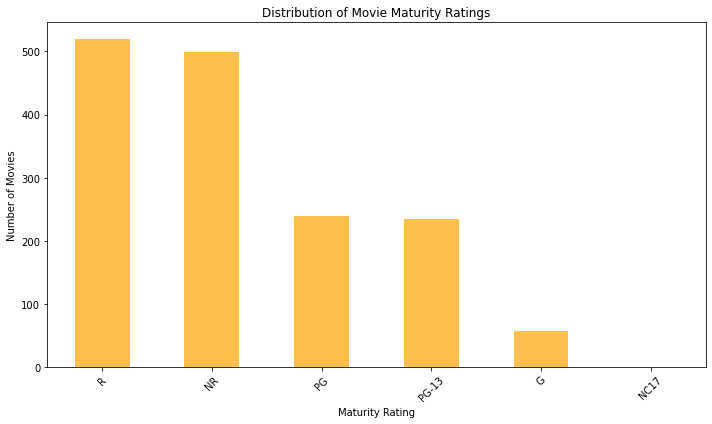

Maturity Rating Distribution:
R        520
NR       499
PG       240
PG-13    235
G         57
NC17       1
Name: maturity_rating, dtype: int64


In [140]:
#  Maturity Rating Distribution (from Rotten Tomatoes data)
plt.figure(figsize=(10, 6))
rating_counts = rt_movies_df['maturity_rating'].value_counts()
rating_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Distribution of Movie Maturity Ratings')
plt.xlabel('Maturity Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
print("Maturity Rating Distribution:")
print(rating_counts)

### Release Year distribution


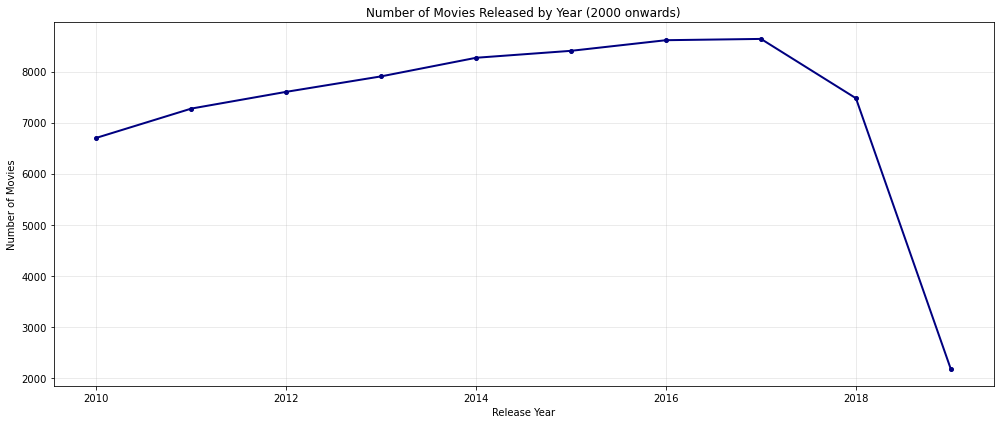

Movies by Recent Years (2015-2020):
2014    8269
2015    8405
2016    8613
2017    8638
2018    7476
2019    2169
Name: start_year, dtype: int64


In [141]:
#  Release Year Distribution (from IMDB data)
plt.figure(figsize=(14, 6))
year_counts = movies_df['start_year'].value_counts().sort_index()

# Filter to recent years for better visualization
recent_years = year_counts[year_counts.index >= 2000]
recent_years.plot(kind='line', marker='o', color='navy', linewidth=2, markersize=4)
plt.title('Number of Movies Released by Year (2000 onwards)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary
print("Movies by Recent Years (2015-2020):")
print(recent_years.tail(6))